<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
# !nvidia-smi

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.1


## 1. What are 3 areas in industry where computer vision is currently being used?

- Transpostation
- Medical area
- Face ID

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

When a machine learning model performs well on its training data but poorly on new, unseen data because it has 'memorized" the training data, including its noise, instead of learning the general underlying patterns

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Drop out 
- generalization
- augmentation

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [3]:
# done, i used an orange image, and it gave a 47% of orange and 49% of bell pepper

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch 
import pandas as pd
from torchvision import datasets
import torchvision


train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform= torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data  = datasets.MNIST(
    root='data',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)


In [5]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [7]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [8]:
import random
import matplotlib.pyplot as plt

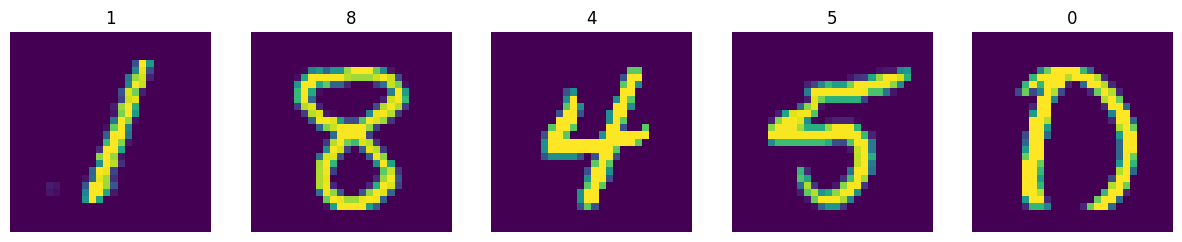

In [9]:
fig  = plt.figure(figsize=(15, 3))
for i in range(1, 5+1):
    x = random.randint(0, len(train_data))
    img, label = train_data[x]
    fig.add_subplot(1, 5, i) #(num of rows, num of cols, index)
    plt.title(f'{label}')
    plt.imshow(img.squeeze())
    plt.axis(False)
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

# iter(train_dataloader)
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [11]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [12]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn

In [15]:
class TinyVGG(nn.Module):
    def __init__(self, input_units, output_units, hidden_units):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(input_units, hidden_units, kernel_size=3, stride=1, padding=1), #1 * 28 * 28 - > hidden * 28 * 28
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1), # hidden * 28 * 28 -> hidden * 28 * 28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # 14 * 14
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1), # hidden *  14 * 14 -> hidden * 14 * 14
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1), # hidden * 14 * 14 -> hidden * 14 
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # hidden * 7 * 7 -> [batch_size, hidden_units, 7, 7]
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(7 * 7 * hidden_units, out_features=output_units) 
        )

    def forward(self, x):
        return self.classifier(self.block_2(self.block_1(x)))

model = TinyVGG(1, len(train_data.classes), 10).to(device)
model

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [17]:
def acccuracy_function(y_pred, y):
    return (y_pred == y).sum() / len(y_pred)

In [18]:
def train_step(model: torch.nn.Module, data_loader, loss_func, optimizer, accuracy_fn, device : torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss 
        train_acc += accuracy_fn(y_pred.argmax(dim=1), y)
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"train loss: {train_loss:.5f} | train acc: {train_acc:.5f}")

In [19]:
def test_step(model, data_loader, loss_fn, accuracy_fn, device : torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(data_loader):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_pred.argmax(dim=1), y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f'test loss: {test_loss} | test acc: {test_acc}')
    

In [20]:
import tqdm

In [21]:
torch.manual_seed(42)
EPOCHS = 5

for epoch in range(EPOCHS):
    print(f"Epoch: {epoch} \n----------------------")
    train_step(model, train_dataloader, loss_fn, optimizer, acccuracy_function)

    test_step(model, test_dataloader, loss_fn, acccuracy_function)


Epoch: 0 
----------------------
train loss: 1.62402 | train acc: 0.43250
test loss: 0.20587776601314545 | test acc: 0.9395966529846191
Epoch: 1 
----------------------
train loss: 0.15682 | train acc: 0.95310
test loss: 0.09860984236001968 | test acc: 0.9675519466400146
Epoch: 2 
----------------------
train loss: 0.10044 | train acc: 0.96925
test loss: 0.08004823327064514 | test acc: 0.9747403860092163
Epoch: 3 
----------------------
train loss: 0.08197 | train acc: 0.97497
test loss: 0.07040149718523026 | test acc: 0.9775359630584717
Epoch: 4 
----------------------
train loss: 0.07060 | train acc: 0.97828
test loss: 0.056856270879507065 | test acc: 0.980431318283081


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [24]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [35]:
test_data[0][0].shape

torch.Size([1, 28, 28])

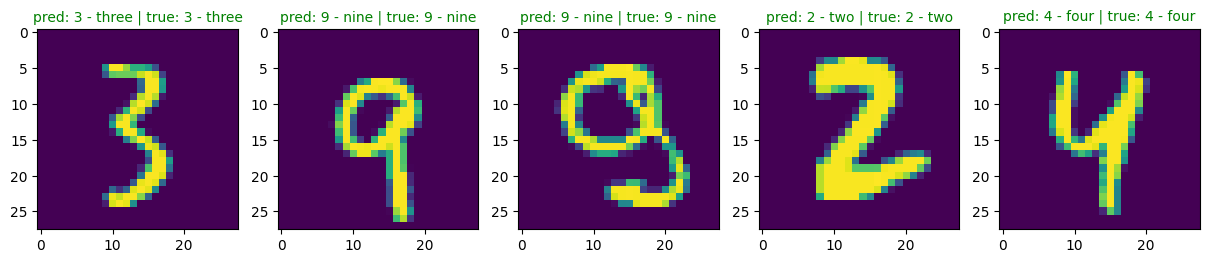

In [41]:
model.eval()

plt.figure(figsize=(15, 3))

for i in range(5):
    index = random.randint(0, len(test_dataloader))
    X, y = list(test_data)[index]
    sample = torch.unsqueeze(X, dim=0)
    y_pred = model(sample)
    y_pred_label = classes[y_pred.argmax()]

    y_true_label = classes[y]

    plt.subplot(1, 5, i + 1)
    plt.imshow(sample.squeeze())

    text_title = f'pred: {y_pred_label} | true: {y_true_label}'

    if y_true_label == y_pred_label:
        plt.title(text_title, fontsize = 10 ,c='g')
    else:
        plt.title(text_title, fontsize = 10,c='r')
plt.show()



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [42]:
from tqdm.auto import tqdm 
y_preds = []
model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
        y_logit = model(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred)
y_pred_tensor = torch.cat(y_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

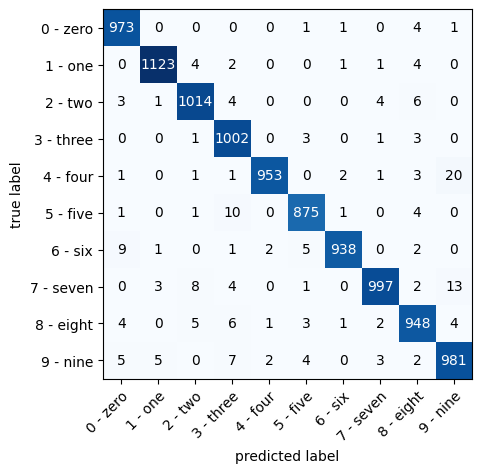

In [43]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmax = ConfusionMatrix(task='multiclass', num_classes=len(classes))
confmat_tensor = confmax(y_pred_tensor, test_data.targets)

fig, ax = plot_confusion_matrix(confmat_tensor.numpy(), class_names=classes)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [49]:
tensor = torch.randn((1, 3, 64, 64))

conv_layer = nn.Conv2d(3, 1, kernel_size=2, stride=2)
print(tensor.shape)
new_tensor = conv_layer(tensor)
print(new_tensor.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 1, 32, 32])


In [50]:
tensor = torch.randn((1, 3, 64, 64))

conv_layer = nn.Conv2d(3, 1, kernel_size=4, stride=2)
print(tensor.shape)
new_tensor = conv_layer(tensor)
print(new_tensor.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 1, 31, 31])


In [51]:
tensor = torch.randn((1, 3, 64, 64))

conv_layer = nn.Conv2d(3, 1, kernel_size=4, stride=4)
print(tensor.shape)
new_tensor = conv_layer(tensor)
print(new_tensor.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 1, 16, 16])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?